In [1]:
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np
from sklearn.metrics import plot_confusion_matrix

from utils import load_dataset, compute_performance_metrics, print_metrics_summary

In [2]:
validation_fraction = 1/3
patience = 10

In [3]:
x_train, x_test, y_train, y_test = load_dataset()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(382646, 243) (382646,)
(97300, 243) (97300,)


In [4]:
gr = GradientBoostingClassifier(n_iter_no_change=patience, validation_fraction=validation_fraction)

In [5]:
gr.fit(x_train, y_train)

GradientBoostingClassifier(n_iter_no_change=10,
                           validation_fraction=0.3333333333333333)

In [6]:
y_pred = gr.predict(x_test)
y_pred_proba = gr.predict_proba(x_test)

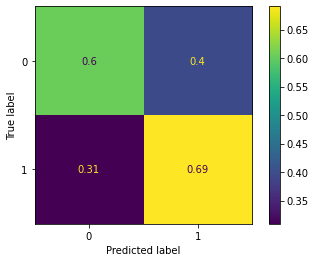

In [7]:
plot_confusion_matrix(gr, x_test, y_test, normalize="true")

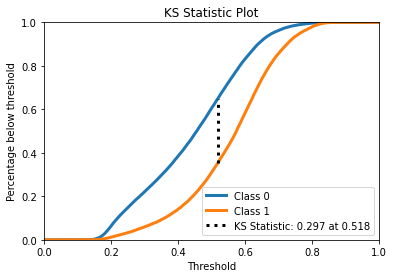


Accuracy:         0.6343
Recall:           0.6909
Precision:        0.4787
F1:               0.5655
AUROC:            0.7053
AUPR:             0.5443


In [8]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [9]:
gr1 = GradientBoostingClassifier(n_estimators=200, n_iter_no_change=patience, validation_fraction=validation_fraction)

In [10]:
gr1.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=200, n_iter_no_change=10,
                           validation_fraction=0.3333333333333333)

In [11]:
y_pred = gr1.predict(x_test)
y_pred_proba = gr1.predict_proba(x_test)

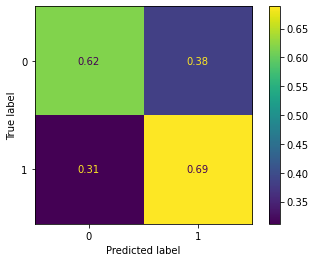

In [12]:
plot_confusion_matrix(gr1, x_test, y_test, normalize="true")

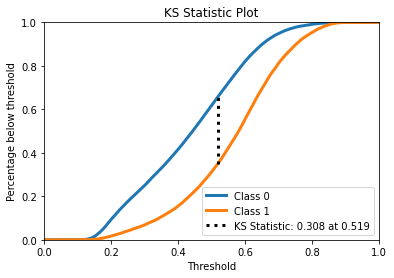


Accuracy:         0.6419
Recall:           0.6884
Precision:        0.4861
F1:               0.5699
AUROC:            0.7107
AUPR:             0.5512


In [13]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [14]:
gr2 = GradientBoostingClassifier(n_estimators=300, n_iter_no_change=patience, validation_fraction=validation_fraction)

In [15]:
gr2.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10,
                           validation_fraction=0.3333333333333333)

In [16]:
y_pred = gr2.predict(x_test)
y_pred_proba = gr2.predict_proba(x_test)

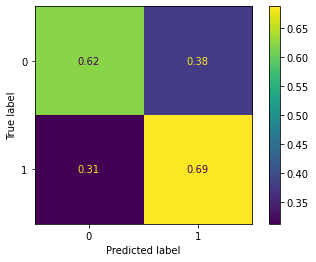

In [17]:
plot_confusion_matrix(gr2, x_test, y_test, normalize="true")

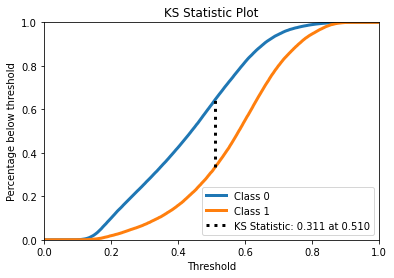


Accuracy:         0.6443
Recall:           0.6882
Precision:        0.4885
F1:               0.5714
AUROC:            0.7124
AUPR:             0.5528


In [18]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [4]:
gr3 = GradientBoostingClassifier(n_estimators=300, subsample=.5, n_iter_no_change=patience, validation_fraction=validation_fraction)

In [5]:
gr3.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10, subsample=0.5,
                           validation_fraction=0.3333333333333333)

In [6]:
y_pred = gr3.predict(x_test)
y_pred_proba = gr3.predict_proba(x_test)

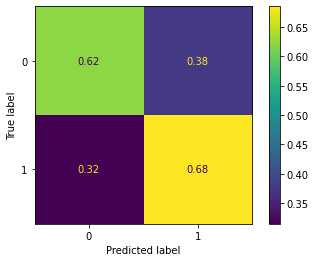

In [7]:
plot_confusion_matrix(gr3, x_test, y_test, normalize="true")

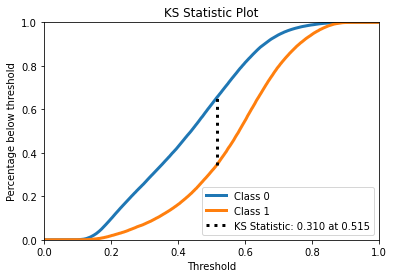


Accuracy:         0.6438
Recall:           0.6849
Precision:        0.4879
F1:               0.5699
AUROC:            0.7107
AUPR:             0.5499


In [8]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [ ]:
gr4 = GradientBoostingClassifier(n_estimators=300, subsample=.7,n_iter_no_change=patience, validation_fraction=validation_fraction)

In [ ]:
gr4.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=300, n_iter_no_change=10, subsample=0.7)

In [ ]:
y_pred = gr4.predict(x_test)
y_pred_proba = gr4.predict_proba(x_test)

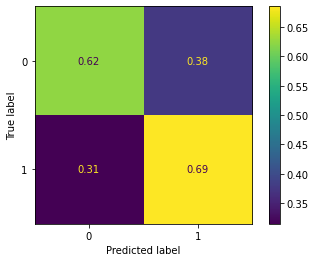

In [ ]:
plot_confusion_matrix(gr4, x_test, y_test, normalize="true")

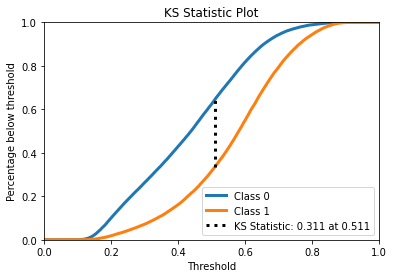


Accuracy:         0.6449
Recall:           0.6855
Precision:        0.4891
F1:               0.5709
AUROC:            0.7123
AUPR:             0.5525


In [ ]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)

In [9]:
gr5 = GradientBoostingClassifier(n_estimators=400, subsample=.7, n_iter_no_change=patience, validation_fraction=validation_fraction)

In [10]:
gr5.fit(x_train, y_train)

GradientBoostingClassifier(n_estimators=400, n_iter_no_change=10, subsample=0.7,
                           validation_fraction=0.3333333333333333)

In [11]:
y_pred = gr5.predict(x_test)
y_pred_proba = gr5.predict_proba(x_test)

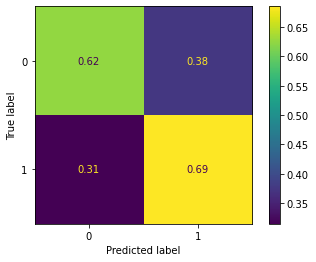

In [12]:
plot_confusion_matrix(gr5, x_test, y_test, normalize="true")

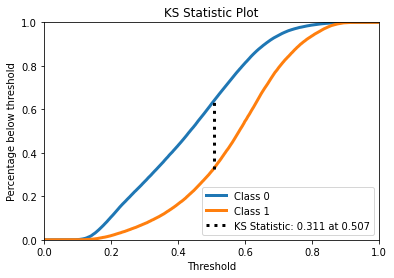


Accuracy:         0.6458
Recall:           0.6853
Precision:        0.4900
F1:               0.5714
AUROC:            0.7123
AUPR:             0.5521


In [13]:
accuracy, recall, precision, f1, auroc, aupr = compute_performance_metrics(y_test, y_pred, y_pred_proba)
print_metrics_summary(accuracy, recall, precision, f1, auroc, aupr)